# CPAO1 

# Kayla Hoffman
CS 103A, Spring 2022

This data can be found at https://github.com/tjhickey724/cs103a/tree/L17/data

To download this set, clone the Github repository and checkout brach L17.

Go to the data folder then the classes folder and look at courses.csv .

This data set contains over 35,000 rows dating from 2004 to 2021 and has

columns like subject, course number, term, instructor, title, and enrollment.

What is the relationship between course number and enrollment? 
Which professors teach the largest classes in their departments?

Analysis: Using Pandas, I want to learn more about how the course number 
and enrollment are correlated. I will also investigate the instructors who have
taught the most students since I have been a student at Brandeis. This will give insight
into which subjects have instructors who consistently teach the largest classes.


In [14]:
#needed imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
#load the data
course_df = pd.read_csv('courses.csv')
course_df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


In [3]:
#decribe the data
course_df.describe

<bound method NDFrame.describe of        subj  num suf format         term  code                       inst  \
0      NEJS  188   A    LEC    Fall 2004  1043              Levy, Avigdor   
1      CHEM  121   A    LEC    Fall 2004  1043              Foxman, Bruce   
2      CHEM  130   A    LEC    Fall 2004  1043                Yu, Jinquan   
3      COMP    1   A    LEC    Fall 2004  1043             Ruesch, Gordon   
4       MUS  118   A    STD    Fall 2004  1043                  Ray, Mary   
...     ...  ...  ..    ...          ...   ...                        ...   
35201  BIOL   26   A    LEC  Summer 2021  1212  Kosinski-Collins, Melissa   
35202  ECON   28   B    LEC  Summer 2021  1212         AlMehdar, Mohammed   
35203  PHIL    1   A    LEC  Summer 2021  1212                Lupu, Peter   
35204  AAAS  160   B    LEC  Summer 2021  1212         Plumb, Betsy Loren   
35205   IGS  130   A    LEC  Summer 2021  1212            Campion, Selene   

                                         

In [4]:
course_df.columns

Index(['subj', 'num', 'suf', 'format', 'term', 'code', 'inst', 'title', 'sec',
       'enr'],
      dtype='object')

In [5]:
course_df.values
#course_df.keys

array([['NEJS', 188, 'A', ..., 'RISE/DECLINE:OTTOMAN EMP', '1', 32],
       ['CHEM', 121, 'A', ..., 'INORGANIC CHEM I, LECS.', '1', 18],
       ['CHEM', 130, 'A', ..., 'ADV ORG. CHEM: STRUCTURE', '1', 14],
       ...,
       ['PHIL', 1, 'A', ..., 'Introduction to Philosophy', '1', 3],
       ['AAAS', 160, 'B', ...,
        'If We Must Die: War and Military Service in African American History',
        '1', 3],
       ['IGS', 130, 'A', ..., 'Global Migration', '1', 1]], dtype=object)

Simple Plot of Course Number and Enrollment

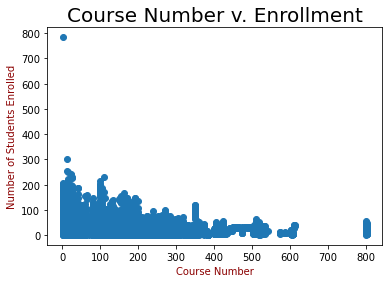

In [6]:
#Simple plot of course numbers and enrollments
#using entire timeperiod
plt.scatter(course_df["num"], course_df["enr"])

plt.xlabel("Course Number", color='darkred')
plt.ylabel("Number of Students Enrolled", color='darkred')

plt.title("Course Number v. Enrollment", size=20)
plt.show()

Simple Plot of Course Number and Enrollment without Outliers

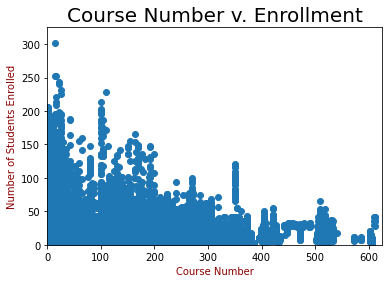

In [7]:
#Simple plot with extreme values removed
plt.scatter(course_df["num"], course_df["enr"])
plt.xlabel("Course Number", color='darkred')
plt.ylabel("Number of Students Enrolled", color='darkred')
plt.title("Course Number v. Enrollment", size=20)

plt.xlim([0, 625])
plt.ylim([0, 325])

plt.show()
#trend that the higher the course number, the lower the number of enrolled students

In [8]:
#restrict time interval to since I've been a student here
#Fall 2018 - Summer 2021
course_df2 = course_df[course_df['code']>=1183]
course_df2

,subj,num,suf,format,term,code,inst,title,sec,enr
1945,EL,60,A,LAB,Fall 2018,1183,"Lobo, Katherine",EXPERIENTIAL LEARNING PRACTICM,1,1
1946,EL,13,A,LAB,Fall 2018,1183,"Dellelo, Mark",MULTIMEDIA STORYTELLING,1,8
1947,BIOL,156,A,LAB,Fall 2018,1183,"Sutera, Vincent",PROJECT LAB IN BIOTECH.,1,16
1948,BIOL,42,B,LAB,Fall 2018,1183,"Miara, Maria",HUMAN PHYSIOLOGY LAB,1,17
1949,BIOL,107,A,LAB,Fall 2018,1183,"Miller, Paul",DATA ANALYSIS STATS WORKSHOP,1,24
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


In [9]:
#add year column to table
pd.options.mode.chained_assignment = None  # default='warn'
course_df3 = course_df2.copy()
def code2year(code):
    ''' returns the academic year corresponding to a code'''
    code=str(code)
    year = int("20"+code[1:-1])
    if code[-1]!='3':
        year = year -1
    return year
course_df3['year'] = course_df3['code'].apply(code2year)
course_df3

,subj,num,suf,format,term,code,inst,title,sec,enr,year
1945,EL,60,A,LAB,Fall 2018,1183,"Lobo, Katherine",EXPERIENTIAL LEARNING PRACTICM,1,1,2018
1946,EL,13,A,LAB,Fall 2018,1183,"Dellelo, Mark",MULTIMEDIA STORYTELLING,1,8,2018
1947,BIOL,156,A,LAB,Fall 2018,1183,"Sutera, Vincent",PROJECT LAB IN BIOTECH.,1,16,2018
1948,BIOL,42,B,LAB,Fall 2018,1183,"Miara, Maria",HUMAN PHYSIOLOGY LAB,1,17,2018
1949,BIOL,107,A,LAB,Fall 2018,1183,"Miller, Paul",DATA ANALYSIS STATS WORKSHOP,1,24,2018
...,...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9,2020
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4,2020
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3,2020
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3,2020


Pivot Table

In [10]:
#by year and enrollment per subject
inst_pt = pd.pivot_table(course_df3, values='enr', index=["term"], columns=["subj"])
inst_pt

subj,AAAS,AAAS/ENG,AAAS/FA,AAAS/HIS,AAAS/WGS,AAPI,AAPI/HIS,AAPI/WGS,AAS/AAPI,AMST,...,SAS,SJSP,SOC,SQS,THA,TYP,UWS,WGS,WMGS,YDSH
term,,,,,,,,,,,,,,,,,,,,,
Fall 2018,18.857143,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,15.333333,...,7.0,6.0,23.714286,NaN,14.304348,12.666667,17.066667,NaN,24.600000,5.0
Fall 2019,21.166667,12.0,NaN,NaN,23.0,NaN,24.0,NaN,NaN,18.333333,...,20.0,6.0,31.357143,NaN,15.300000,13.333333,17.423077,NaN,19.714286,4.0
Fall 2020,29.500000,NaN,NaN,28.0,23.0,NaN,40.0,4.0,NaN,16.000000,...,14.0,7.0,29.000000,NaN,13.875000,NaN,17.458333,21.0,NaN,7.0
Spring 2019,23.428571,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.800000,...,18.0,NaN,30.100000,15.0,15.291667,10.666667,17.760000,NaN,15.500000,3.5
Spring 2020,18.333333,NaN,11.0,NaN,19.5,NaN,22.0,15.0,NaN,27.000000,...,33.0,NaN,35.055556,30.0,11.076923,11.666667,17.760000,NaN,24.666667,5.0
Spring 2021,13.250000,NaN,NaN,20.0,33.0,NaN,16.0,51.0,13.0,16.142857,...,NaN,NaN,32.375000,NaN,12.454545,NaN,17.210526,27.0,NaN,5.0
Summer 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.000000,NaN,10.250000,NaN,9.000000,NaN,NaN,NaN
Summer 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.500000,NaN,8.666667,NaN,9.500000,NaN,NaN,NaN
Summer 2021,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Popular Classes from 2018-2021')

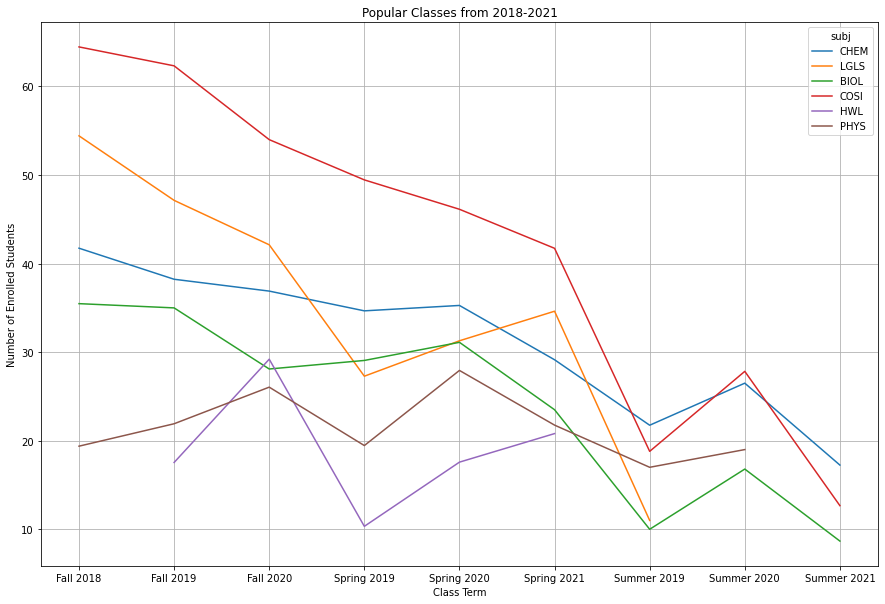

In [16]:
inst_pt[['CHEM','LGLS','BIOL','COSI','HWL', 'PHYS']].plot(figsize=(15,10))
plt.grid()
plt.xlabel("Class Term")
plt.ylabel("Number of Enrolled Students")
plt.title("Popular Classes from 2018-2021")

Group By feature

In [12]:
#groupby subject then instructors
#this table show the professor in each department that taught
#the most students within this timeframe (2018-2021)
fac = course_df2.groupby(['subj','inst'],as_index=False)['enr'].agg([sum])
fac = fac.loc[fac.groupby('subj')['sum'].idxmax()]
fac = fac.sort_values(ascending=False, by='sum')
fac.head(15)

,,sum
subj,inst,
CHEM,"Dolnik, Milos",1481
LGLS,"Breen, Daniel",1117
BIOL,"Kosinski-Collins, Melissa",1099
COSI,"Di Lillo, Antonella",1079
HWL,"Berkenwald, Leah",988
PHYS,"Mistark, Peter",936
HS,"Chilingerian, Jon",934
BUS,"Namini, Ahmad",879
PSYC,"Wright, Ellen",807


In [17]:
#This table shows the instructors who taught the most student, regardless of department
#groupby subject then instructors showing the maximum number of students
#taught by them within this timeframe (2018-2021)
max_enr = course_df2.groupby(['subj','inst'])['enr'].agg([sum])
max_enr = max_enr.sort_values(ascending=False, by='sum')
max_enr.head(15)
#The top 3 most popular instructors taught Chem classes

sum
subj inst                           
CHEM Dolnik, Milos              1481
     Mascall, Kristen           1329
     Novack, Claudia            1178
LGLS Breen, Daniel              1117
BIOL Kosinski-Collins, Melissa  1099
COSI Di Lillo, Antonella        1079
BIOL Miara, Maria               1020
CHEM Murray, Stephanie           988
HWL  Berkenwald, Leah            988
PHYS Mistark, Peter              936
HS   Chilingerian, Jon           934
BUS  Namini, Ahmad               879
BIOL Morris, James               848
COSI Hickey, Timothy             832
PSYC Wright, Ellen               807

# Discussion and Analysis
From the simple plot of course numbers and enrollment, I saw a strong negative correlation. The lower the course number, the higher the enrollment of students. This is probably because low course numbers are given to instroductory courses. There are some spikes around 100 level courses, and these are probably core courses for majors, and the 350 fluctuation is probably graduate-level classes.

The pivot table shows that not all subjects (particularly the cross-listed courses) have enrollment for every period. Summer courses also have lower enrollment.

The GroupBy tables show cummulative numbers of students taught since the Fall of 2018 (when I started Brandeis) by a given professor. The first table shows the most popular (by students taught) professor for each subject. Chemistry professors by far have the most students, followed by legal studies, biology, and computer science. Chem professors are even the top three most popular professors. This may also indicate that these departments have the largest class sizes.